Qualifier 2 - Data Engineering (Mini Hackathon)

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib
import json

In [55]:
data = pd.read_json('DataEngineeringQ2.json')

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   _id               31 non-null     object
 1   appointmentId     31 non-null     object
 2   patientDetails    31 non-null     object
 3   phoneNumber       31 non-null     object
 4   consultationData  31 non-null     object
dtypes: object(5)
memory usage: 1.3+ KB


In [57]:
data.describe

<bound method NDFrame.describe of          _id appointmentId                                     patientDetails  \
0   T6hf3rb5     40d2-9c9f  {'_id': 'T6hb630b3', 'firstName': 'Css', 'last...   
1   T65g3rb5      40dbtc9f  {'_id': 'T6h33b300', 'firstName': 'Lokesh', 'l...   
2   T7g6Srb5      g3Wt5c9f  {'_id': 'TjhB4373', 'phrId': '63b5hvy614d5', '...   
3   94bg8W8d      fb6-a535  {'_id': '6df4R5b', 'phrId': '644nig7y', 'first...   
4   T6h8H56c       67h7KL9  {'_id': 'lK9hy06a', 'firstName': 'Raghu Viju',...   
5    T9Jh8c8        Hy7Y91  {'_id': 'kI9d5c6', 'firstName': 'Dinesh Kumar'...   
6   9Is624b9     10dY8a-4a  {'_id': 'i9R324b7', 'phrId': '67Yt2b97', 'firs...   
7   T8H9c3c6      e8056Ye8  {'_id': 'T6h41b5ad3d8002ad9c3c4', 'firstName':...   
8    T8Ud380     dbc0-c66b  {'_id': 'T9Iy347e', 'firstName': 'Dinesh', 'la...   
9    T345fG4        1576a7  {'_id': 'T4Rb1a2', 'firstName': 'Sanjay', 'las...   
10  T4F6a175       b6Te4ac  {'_id': 'Tr4T2173', 'phrId': '6E48U79', 'first.

# STEP-1

STEP-1 a.

In [58]:
selected_columns = ['appointmentId', 'phoneNumber', 'patientDetails', 'consultationData']
df = data[selected_columns]

In [59]:
df['firstName'] = df['patientDetails'].apply(lambda x: x.get('firstName'))

In [60]:
df['lastName'] = df['patientDetails'].apply(lambda x: x.get('lastName'))

In [61]:
df['gender'] = df['patientDetails'].apply(lambda x: 'male' if x.get('gender') == 'M' else 'female' if x.get('gender') == 'F' else 'others')

In [62]:
df['DOB'] = df['patientDetails'].apply(lambda x: x.get('birthDate'))

STEP-1 b.

In [63]:
df['fullName'] = df['firstName'] + ' ' + df['lastName']

STEP-1 c.

In [64]:
def is_valid_mobile(phone):
    if phone.startswith('+91') or phone.startswith('91'):
        phone = phone[3:] if phone.startswith('+91') else phone[2:]
    return phone.isdigit() and 6000000000 <= int(phone) <= 9999999999

df['isValidMobile'] = df['phoneNumber'].apply(is_valid_mobile)

STEP-1 d.

In [65]:
def hash_phone(phone):
    if is_valid_mobile(phone):
        phone = phone[3:] if phone.startswith('+91') else phone[2:]
        return hashlib.sha256(phone.encode()).hexdigest()
    return None

df['phoneNumberHash'] = df['phoneNumber'].apply(hash_phone)

STEP-1 e.

In [66]:
def calculate_age(dob):
    if dob is not None:
        birth_year = int(dob[:4])
        current_year = pd.Timestamp.now().year
        return current_year - birth_year
    return None

df['Age'] = df['DOB'].apply(calculate_age)

STEP-1 f.

In [67]:
df['noOfMedicines'] = df['consultationData'].apply(lambda x: len(x.get('medicines', [])))
df['noOfActiveMedicines'] = df['consultationData'].apply(lambda x: sum(1 for med in x.get('medicines', []) if med['isActive']))
df['noOfInActiveMedicines'] = df['consultationData'].apply(lambda x: sum(1 for med in x.get('medicines', []) if not med['isActive']))

STEP-1 g.

In [68]:
df['medicineNames'] = df['consultationData'].apply(lambda x: ', '.join(med.get('medicineName', '') for med in x.get('medicines', []) if med['isActive']))

In [69]:
print(df)

   appointmentId     phoneNumber  \
0      40d2-9c9f     96686896670   
1       40dbtc9f      9496368916   
2       g3Wt5c9f      7787204833   
3       fb6-a535      9376756879   
4        67h7KL9      5267384241   
5         Hy7Y91   +919826374025   
6      10dY8a-4a      7587265252   
7       e8056Ye8      5586958767   
8      dbc0-c66b      9987602525   
9         1576a7      9234354366   
10       b6Te4ac      4863281056   
11        bu5Qfb      8687986800   
12       86U8Y45                   
13       Ufd7231      7152684236   
14       E4u5Ea2                   
15      T4E3e410      9184723620   
16       04Re22d                   
17      af9784hf      5847346075   
18       I8eW201      9064537237   
19     f7r501cb1                   
20    cf092c8t6c       992727892   
21      O02n262e      6888324121   
22      5dfN9s41      8248594521   
23      cc86re0f   +917938475936   
24       bd99dU7  +9124648979746   
25        bcWe50   +916883788633   
26       7au8se3   +91663627

# STEP-2

In [72]:
selected_columns = ['appointmentId', 'fullName', 'phoneNumber', 'isValidMobile', 'phoneNumberHash','gender', 'DOB', 'Age', 'noOfMedicines', 'noOfActiveMedicines', 'noOfInActiveMedicines','medicineNames']
df_final = df[selected_columns]

In [73]:
df_final

,appointmentId,fullName,phoneNumber,isValidMobile,phoneNumberHash,gender,DOB,Age,noOfMedicines,noOfActiveMedicines,noOfInActiveMedicines,medicineNames
0,40d2-9c9f,Css,96686896670,False,None,others,None,NaN,2,1,1,A
1,40dbtc9f,Lokesh,9496368916,True,3e0e24ac31bedf2e1df479e0000a1e5621c27255515747...,male,1996-05-16T18:30:00.000Z,27.0,2,1,1,A
2,g3Wt5c9f,Shila Das,7787204833,True,d4796bd0121681780c68e8c5770a488a115cd5dd858630...,others,None,NaN,3,2,1,"B, C"
3,fb6-a535,Bhavika Ben Panchal,9376756879,True,e76fff35bb2b96e3d27d63885113ac6de5407b4d8928f8...,female,1988-04-24T14:30:00.000Z,35.0,1,1,0,B
4,67h7KL9,Raghu Viju,5267384241,False,None,others,None,NaN,2,2,0,"D, A"
5,Hy7Y91,Dinesh Kumar,+919826374025,True,a222f59bd3a23b4b32d5d7af18c9944ff9673a71aa37b1...,male,1983-05-16T18:30:00.000Z,40.0,4,2,2,"A, E"
6,10dY8a-4a,Lalit Sankhwal,7587265252,True,c96d995f728ce3945997e77dc4a26276b05df3921b38a0...,male,2003-06-27T14:30:00.000Z,20.0,2,2,0,"D, E"
7,e8056Ye8,Ravi,5586958767,False,None,others,None,NaN,1,1,0,A
8,dbc0-c66b,Dinesh,9987602525,True,aa11fe3e53f7d3534a33f22d7738d5a8a1c67f7e9f89d8...,male,1983-05-16T18:30:00.000Z,40.0,1,1,0,E
9,1576a7,Sanjay,9234354366,True,bb5587d497a3358c93108c8cdcd4b0e226c649c82e03d1...,male,1998-05-16T18:30:00.000Z,25.0,0,0,0,


In [74]:
df_final.to_csv('output.csv', sep='~', index=False)

STEP-2 h. 1.

In [75]:
aggregated_data = {
    'Age': df_final['Age'].mean(),
    'gender': df_final['gender'].value_counts().to_dict(),
    'validPhoneNumbers': df_final['isValidMobile'].sum(),
    'appointments': len(df_final),
    'medicines': df_final['noOfMedicines'].sum(),
    'activeMedicines': df_final['noOfActiveMedicines'].sum()
}

In [76]:
aggregated_data['Age'] = int(aggregated_data['Age'])
aggregated_data['validPhoneNumbers'] = int(aggregated_data['validPhoneNumbers'])
aggregated_data['appointments'] = int(aggregated_data['appointments'])
aggregated_data['medicines'] = int(aggregated_data['medicines'])
aggregated_data['activeMedicines'] = int(aggregated_data['activeMedicines'])

In [77]:
with open('aggregated_data.json', 'w') as json_file:
    json.dump(aggregated_data, json_file)

STEP-2 h. 2.

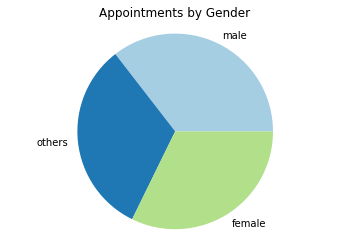

In [83]:
palette_color=sns.color_palette("Paired")
plt.pie(gender_counts, labels=gender_counts.index, colors=palette_color)
plt.title('Appointments by Gender')
plt.axis('equal')
plt.show()

Name: Alankriti Kalsi (RA2011027010023)